In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
# from plotnine import *

In [2]:
from IPython.display import display
# from tqdm import tqdm_notebook as tqdm

In [3]:
from datetime import datetime, timedelta

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")

In [5]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [9]:
# df = pd.read_csv('Walmart/preprocessed.csv')
df = pd.read_csv('Walmart/rajeev_all.csv')

df['Date'] = pd.to_datetime(df['Date'])

holidays = sorted(df.query('IsHoliday==True').DateString.unique())
stores = sorted(df.Store.unique())

In [ ]:
df

In [10]:
df[df['WeeklySalesIncreaseRatio'].notnull()]['Date'].min()

Timestamp('2011-02-04 00:00:00')

In [11]:
len(df[df['WeeklySalesIncreaseRatio'].notnull()])

4095

In [12]:
df[df['WeeklySalesIncreaseRatio'].notnull()]['YearWeek'].min()

'2011-05'

In [13]:
df[df['WeeklySalesIncreaseRatio'].notnull()].sort_values(by='YearWeek')

Unnamed: 0       Date  IsHoliday  Train  WeeklySales  DateString  Week  \
2340        2340 2011-02-04      False   True      22628.0  2011-02-04     5   
2365        2365 2011-02-04      False   True      13609.0  2011-02-04     5   
2366        2366 2011-02-04      False   True      22930.0  2011-02-04     5   
2367        2367 2011-02-04      False   True      22040.0  2011-02-04     5   
2368        2368 2011-02-04      False   True       7638.0  2011-02-04     5   
2369        2369 2011-02-04      False   True      10228.0  2011-02-04     5   
2370        2370 2011-02-04      False   True      20916.0  2011-02-04     5   
2371        2371 2011-02-04      False   True      15076.0  2011-02-04     5   
2372        2372 2011-02-04      False   True       5204.0  2011-02-04     5   
2374        2374 2011-02-04      False   True      11326.0  2011-02-04     5   
2375        2375 2011-02-04      False   True       9940.0  2011-02-04     5   
2376        2376 2011-02-04      False   True      11915.0  2011-02-04     5   
2377        2377 2011-02-04      False   True       8211.0  2011-02-04     5   
2378        2378 2011-02-04      False   True      19761.0  2011-02-04     5   
2379        2379 2011-02-04      False   True      12736.0  2011-02-04     5   
2380        2380 2011-02-04      False   True      16611.0  2011-02-04     5   
2381        2381 2011-02-04      False   True      12486.0  2011-02-04     5   
2382        2382 2011-02-04      False   True      13862.0  2011-02-04     5   
2383        2383 2011-02-04      False   True       5999.0  2011-02-04     5   
2384        2384 2011-02-04      False   True      11683.0  2011-02-04     5   
2364        2364 2011-02-04      False   True       9272.0  2011-02-04     5   
2363        2363 2011-02-04      False   True      17016.0  2011-02-04     5   
2373        2373 2011-02-04      False   True      13314.0  2011-02-04     5   
2361        2361 2011-02-04      False   True      13912.0  2011-02-04     5   
2362        2362 2011-02-04      False   True      16330.0  2011-02-04     5   
2342        2342 2011-02-04      False   True       6960.0  2011-02-04     5   
2343        2343 2011-02-04      False   True      29431.0  2011-02-04     5   
2344        2344 2011-02-04      False   True       5150.0  2011-02-04     5   
2345        2345 2011-02-04      False   True      21338.0  2011-02-04     5   
2346        2346 2011-02-04      False   True       8087.0  2011-02-04     5   
2347        2347 2011-02-04      False   True      13689.0  2011-02-04     5   
2348        2348 2011-02-04      False   True       8644.0  2011-02-04     5   
2349        2349 2011-02-04      False   True      27718.0  2011-02-04     5   
2350        2350 2011-02-04      False   True      20616.0  2011-02-04     5   
2341        2341 2011-02-04      False   True      26796.0  2011-02-04     5   
2360        2360 2011-02-04      False   True       8898.0  2011-02-04     5   
2352        2352 2011-02-04      False   True      25317.0  2011-02-04     5   
2353        2353 2011-02-04      False   True      28925.0  2011-02-04     5   
2354        2354 2011-02-04      False   True       8065.0  2011-02-04     5   
2355        2355 2011-02-04      False   True       7488.0  2011-02-04     5   
2356        2356 2011-02-04      False   True      12188.0  2011-02-04     5   
2357        2357 2011-02-04      False   True      15302.0  2011-02-04     5   
2358        2358 2011-02-04      False   True      19579.0  2011-02-04     5   
2359        2359 2011-02-04      False   True      32654.0  2011-02-04     5   
2351        2351 2011-02-04      False   True      15612.0  2011-02-04     5   
2416        2416 2011-02-11       True   True      15836.0  2011-02-11     6   
2415        2415 2011-02-11       True   True      21679.0  2011-02-11     6   
2414        2414 2011-02-11       True   True      10019.0  2011-02-11     6   
2409        2409 2011-02-11       True   True       8795.0  2011-02-11     6   
2412  

In [14]:
df.sort_values(by='YearWeek')

Unnamed: 0       Date  IsHoliday  Train  WeeklySales  DateString  Week  \
0              0 2010-02-05      False   True      22516.0  2010-02-05     5   
25            25 2010-02-05      False   True      14987.0  2010-02-05     5   
26            26 2010-02-05      False   True      26775.0  2010-02-05     5   
27            27 2010-02-05      False   True      23227.0  2010-02-05     5   
28            28 2010-02-05      False   True       8161.0  2010-02-05     5   
29            29 2010-02-05      False   True       8944.0  2010-02-05     5   
30            30 2010-02-05      False   True      20126.0  2010-02-05     5   
31            31 2010-02-05      False   True      15105.0  2010-02-05     5   
32            32 2010-02-05      False   True       6864.0  2010-02-05     5   
34            34 2010-02-05      False   True      18367.0  2010-02-05     5   
35            35 2010-02-05      False   True      12303.0  2010-02-05     5   
36            36 2010-02-05      False   True      10938.0  2010-02-05     5   
37            37 2010-02-05      False   True       7029.0  2010-02-05     5   
38            38 2010-02-05      False   True      18097.0  2010-02-05     5   
39            39 2010-02-05      False   True      14520.0  2010-02-05     5   
40            40 2010-02-05      False   True      15303.0  2010-02-05     5   
41            41 2010-02-05      False   True      11812.0  2010-02-05     5   
42            42 2010-02-05      False   True      13479.0  2010-02-05     5   
43            43 2010-02-05      False   True       5856.0  2010-02-05     5   
44            44 2010-02-05      False   True      13293.0  2010-02-05     5   
24            24 2010-02-05      False   True      10107.0  2010-02-05     5   
23            23 2010-02-05      False   True      19287.0  2010-02-05     5   
33            33 2010-02-05      False   True      12922.0  2010-02-05     5   
21            21 2010-02-05      False   True      15418.0  2010-02-05     5   
22            22 2010-02-05      False   True      18954.0  2010-02-05     5   
2              2 2010-02-05      False   True       7101.0  2010-02-05     5   
3              3 2010-02-05      False   True      29248.0  2010-02-05     5   
4              4 2010-02-05      False   True       5115.0  2010-02-05     5   
5              5 2010-02-05      False   True      22638.0  2010-02-05     5   
6              6 2010-02-05      False   True       6898.0  2010-02-05     5   
7              7 2010-02-05      False   True      14552.0  2010-02-05     5   
8              8 2010-02-05      False   True       8862.0  2010-02-05     5   
9              9 2010-02-05      False   True      29240.0  2010-02-05     5   
10            10 2010-02-05      False   True      21222.0  2010-02-05     5   
1              1 2010-02-05      False   True      29273.0  2010-02-05     5   
20            20 2010-02-05      False   True      12099.0  2010-02-05     5   
12            12 2010-02-05      False   True      26229.0  2010-02-05     5   
13            13 2010-02-05      False   True      36950.0  2010-02-05     5   
14            14 2010-02-05      False   True       9451.0  2010-02-05     5   
15            15 2010-02-05      False   True       7344.0  2010-02-05     5   
16            16 2010-02-05      False   True      11271.0  2010-02-05     5   
17            17 2010-02-05      False   True      17989.0  2010-02-05     5   
18            18 2010-02-05      False   True      20939.0  2010-02-05     5   
19            19 2010-02-05      False   True      32895.0  2010-02-05     5   
11            11 2010-02-05      False   True      15714.0  2010-02-05     5   
76            76 2010-02-12       True   True      15824.0  2010-02-12     6   
75            75 2010-02-12       True   True      21745.0  2010-02-12     6   
74            74 2010-02-12       True   True      10150.0  2010-02-12     6   
69            69 2010-02-12       True   True       8454.0  2010-02-12     6   
72    

In [16]:
#We'll build simple machine learning models that predict the sales increase from last year

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
import random
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [18]:
# stores

In [19]:
train_stores = random.sample(stores, int(len(stores)*0.75))
test_stores = [s for s in stores if s not in train_stores]

In [20]:
len(train_stores), len(test_stores)

(33, 12)

In [21]:
test_stores

[3, 5, 8, 9, 10, 12, 14, 24, 27, 32, 38, 40]

In [22]:
store_dummies = ['Store_%s'%i for i in sorted(df.Store.unique())]
store_dummies

['Store_1',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_12',
 'Store_13',
 'Store_14',
 'Store_15',
 'Store_16',
 'Store_17',
 'Store_18',
 'Store_19',
 'Store_20',
 'Store_21',
 'Store_22',
 'Store_23',
 'Store_24',
 'Store_25',
 'Store_26',
 'Store_27',
 'Store_28',
 'Store_29',
 'Store_30',
 'Store_31',
 'Store_32',
 'Store_33',
 'Store_34',
 'Store_35',
 'Store_36',
 'Store_37',
 'Store_38',
 'Store_39',
 'Store_40',
 'Store_41',
 'Store_42',
 'Store_43',
 'Store_44',
 'Store_45']

In [ ]:
# del(store_dummies)

In [ ]:
df_train = df[(df.YearWeek>=train_start) & (df.YearWeek<=train_end) & (df.Store.isin(train_stores))]
df_train

In [23]:
features = ['Year', 'Week', 'IsHoliday'] + store_dummies
train_start="2011-05" 
train_end="2012-43" 
forecast_start="2012-44"
# perform training on the training set

df_train = df[(df.YearWeek>=train_start) & (df.YearWeek<=train_end) & (df.Store.isin(train_stores))]
# df_train = df[(df.YearWeek>=train_start) & (df.YearWeek<=train_end) & (df.Store.isin(train_stores)) & df['WeeklySalesIncreaseRatio'].notnull()]
X = df_train[features].values
y = df_train['WeeklySalesIncreaseRatio'].values

In [167]:
features

['Year',
 'Week',
 'IsHoliday',
 'Store_1',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_12',
 'Store_13',
 'Store_14',
 'Store_15',
 'Store_16',
 'Store_17',
 'Store_18',
 'Store_19',
 'Store_20',
 'Store_21',
 'Store_22',
 'Store_23',
 'Store_24',
 'Store_25',
 'Store_26',
 'Store_27',
 'Store_28',
 'Store_29',
 'Store_30',
 'Store_31',
 'Store_32',
 'Store_33',
 'Store_34',
 'Store_35',
 'Store_36',
 'Store_37',
 'Store_38',
 'Store_39',
 'Store_40',
 'Store_41',
 'Store_42',
 'Store_43',
 'Store_44',
 'Store_45']

In [24]:
len(X), len(y), len(df)

(3003, 3003, 8190)

In [ ]:
len(X), len(y), len(df)

In [ ]:
y

In [25]:
len(train_stores), len(test_stores)

(33, 12)

In [ ]:
df.columns

In [ ]:
df_train.columns

In [ ]:
features

In [ ]:
len(df)
# df_train[features]

In [ ]:
# features
# all_feat = features.append('WeeklySalesIncreaseRatio')
# type(all_feat)
# df_train[features].to_csv('Walmart/before_regressor.csv')

In [26]:
df_train['WeeklySalesIncreaseRatio']

2340    1.004974
2341    0.915383
2343    1.006257
2345    0.942574
2346    1.172369
2350    0.971445
2352    0.965229
2354    0.853349
2355    1.019608
2356    1.081359
2357    0.850631
2358    0.935049
2359    0.992674
2360    0.735433
2361    0.902322
2362    0.861560
2364    0.917384
2365    0.908054
2367    0.948896
2368    0.935915
2369    1.143560
2370    1.039253
2372    0.758159
2373    1.030336
2374    0.616649
2375    0.807933
2376    1.089322
2378    1.091949
2380    1.085473
2381    1.057061
2382    1.028415
2383    1.024419
2384    0.878884
2385    1.004692
2386    1.014146
2388    1.041437
2390    0.951779
2391    1.083745
2395    0.914337
2397    0.983310
2399    0.866299
2400    0.974133
2401    0.965910
2402    0.930902
2403    0.944330
2404    1.033934
2405    0.953804
2406    1.031851
2407    0.892280
2409    1.040336
2410    0.980651
2412    0.908923
2413    1.054902
2414    0.987094
2415    0.996965
2417    0.832474
2418    1.021131
2419    0.746288
2420    0.7190

In [ ]:
X = df_train[features].values
y = df_train['WeeklySalesIncreaseRatio'].values
# reg = DummyRegressor(strategy='constant', constant=1.008)
reg = LinearRegression()
reg.fit(X,y)

In [101]:
def forecast(regressor, train_start="2011-05", train_end="2012-43", forecast_start="2012-44"):
    
    store_dummies = ['Store_%s'%i for i in sorted(df.Store.unique())]
    features = ['Year', 'Week', 'IsHoliday'] + store_dummies
    
    # perform training on the training set
    
    df_train = df[(df.YearWeek>=train_start) & (df.YearWeek<=train_end) & (df.Store.isin(train_stores))]
    df_train_length = len(df_train)
    X = df_train[features].values
    y = df_train['WeeklySalesIncreaseRatio'].values
    regressor.fit(X,y)
    
    # perform predictions on the test set
    
    dff = df[df.Store.isin(test_stores)].copy()
    
    pred_idx = (dff.YearWeek>=train_start)
    df_pred = dff[pred_idx]

    X_pred = df_pred[features].values
    y_pred = regressor.predict(X_pred)

    dff.loc[pred_idx, 'WeeklySalesIncreaseRatioPredicted'] = y_pred    
    dff.loc[pred_idx, 'WeeklySalesPredicted'] = df_pred['WeeklySalesPreviousYear'] * y_pred
    dff.loc[pred_idx, 'Residuals'] = df_pred['WeeklySales'] - df_pred['WeeklySalesPreviousYear'] * y_pred
    
    # metrics
    
    dfm = dff[(dff.YearWeek>=train_start) & (dff.YearWeek<=train_end)]
    y_pred = dfm.WeeklySalesPredicted.values
    y_actual = dfm.WeeklySales.values
    w = dfm.IsHoliday.map(lambda v: 5 if v else 1).values

    rmse = np.sqrt(np.mean((y_pred-y_actual)**2))    
    wmae = np.sum(w*(y_pred-y_actual)) / np.sum(w)
    mae = np.mean(np.abs(y_pred-y_actual))
    
    
#     return mae, wmae, rmse, dff
    return mae, wmae, rmse, dff, y_pred, dfm, df_pred, pred_idx, regressor, df_train_length

In [125]:
# 1.008 is the average WeeklySalesIncreaseRatio for all stores (see the exploratory notebook)
i = 0
for reg in [DummyRegressor(strategy='constant', constant=1.008),  LinearRegression(), ElasticNet(), XGBRegressor(), SVR(), RandomForestRegressor()]:
    i = i+1
    print(i)
    name = type(reg).__name__

    mae, wmae, rmse, dff, y_pred, dfm, df_pred, pred_idx, regressor, df_train_length = forecast(reg)
    print("%s MAE=%s WMAE=%s RMSE=%s" % (name, mae, wmae, rmse))
    print(y_pred)
    print(df_train_length)
#     print(df_pred)
#     print(pred_idx)
#     print(len(y_pred))
#     print(np.shape(y_pred))
    if(i==6):
        print(dfm[dfm['Store']==3][['YearWeek','WeeklySalesPredicted','WeeklySales','Store']])
#     my_pred = reg.predict()
#     print(df_pred.columns)
#     print(type(df_pred))
#     print(df_pred['Store'].unique())  #3  5  8  9 10 12 14 24 27 32 38 40
#     print(df_pred['WeeklySales'])

1
DummyRegressor MAE=904.1608278388279 WMAE=67.2666376811595 RMSE=1464.1104169537148
[ 7157.808  5155.92  14668.416 ... 17069.472  7337.232 13369.104]
3003
2
LinearRegression MAE=888.4328798636955 WMAE=54.75907361662381 RMSE=1435.190550828408
[ 6930.68700265  4992.31995755 14202.97947649 ... 17421.80627363
  7488.68122509 13645.05826191]
3003
3
ElasticNet MAE=900.4772243006763 WMAE=-1.812191005255179 RMSE=1439.0641292935163
[ 7126.14024876  5133.10905117 14603.51963102 ... 16993.95281966
  7304.77043666 13309.95607932]
3003
4
[13:52:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor MAE=854.7496078515446 WMAE=28.005364790256472 RMSE=1381.0007221251644
[ 6967.82865393  5019.07387197 14279.09344769 ... 17404.31442165
  7481.16243505 13631.35834265]
3003
5
SVR MAE=853.3891949479621 WMAE=17.669410487566395 RMSE=1373.67567088121
[ 6923.19960454  4986.92662684 14187.63563515

In [343]:
df_metrics = pd.DataFrame(columns=['model','mae','wmae','rmse'])
# series_data = pd.Series([10,20,30], index=['mae','wmae','rmse'])
for reg in [DummyRegressor(strategy='constant', constant=1.008),  LinearRegression(), ElasticNet(), XGBRegressor(), SVR(), RandomForestRegressor()]:
    name = type(reg).__name__
    mae, wmae, rmse, dff, y_pred, dfm, df_pred, pred_idx, regressor, df_train_length = forecast(reg)
    series_data = pd.Series([name, mae,wmae,rmse], index=['model','mae','wmae','rmse'])
    df_metrics = df_metrics.append(series_data, ignore_index=True)
df_metrics

[17:53:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


model         mae        wmae         rmse
0         DummyRegressor  904.160828   67.266638  1464.110417
1       LinearRegression  888.432880   54.759074  1435.190551
2             ElasticNet  900.477224   -1.812191  1439.064129
3           XGBRegressor  854.749608   28.005365  1381.000722
4                    SVR  853.389195   17.669410  1373.675671
5  RandomForestRegressor  806.714185  254.064262  1332.929665

In [151]:
# dfm['YearWeek'].apply(lambda x : x.replace('-','+'))
dfm['Counter'] = (dfm['Year']- 2011) * 52 + dfm['Week']
dfm[['YearWeek','Counter']]
# str = '2011-05'
# str.replace('-','+')

C:\Users\rahsood\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


YearWeek  Counter
2342  2011-05        5
2344  2011-05        5
2347  2011-05        5
2348  2011-05        5
2349  2011-05        5
2351  2011-05        5
2353  2011-05        5
2363  2011-05        5
2366  2011-05        5
2371  2011-05        5
2377  2011-05        5
2379  2011-05        5
2387  2011-06        6
2389  2011-06        6
2392  2011-06        6
2393  2011-06        6
2394  2011-06        6
2396  2011-06        6
2398  2011-06        6
2408  2011-06        6
2411  2011-06        6
2416  2011-06        6
2422  2011-06        6
2424  2011-06        6
2432  2011-07        7
2434  2011-07        7
2437  2011-07        7
2438  2011-07        7
2439  2011-07        7
2441  2011-07        7
2443  2011-07        7
2453  2011-07        7
2456  2011-07        7
2461  2011-07        7
2467  2011-07        7
2469  2011-07        7
2477  2011-08        8
2479  2011-08        8
2482  2011-08        8
2483  2011-08        8
2484  2011-08        8
2486  2011-08        8
2488  2011-08        8
2498  2011-08        8
2501  2011-08        8
2506  2011-08        8
2512  2011-08        8
2514  2011-08        8
2522  2011-09        9
2524  2011-09        9
2527  2011-09        9
2528  2011-09        9
2529  2011-09        9
2531  2011-09        9
2533  2011-09        9
2543  2011-09        9
2546  2011-09        9
2551  2011-09        9
2557  2011-09        9
2559  2011-09        9
2567  2011-10       10
2569  2011-10       10
2572  2011-10       10
2573  2011-10       10
2574  2011-10       10
2576  2011-10       10
2578  2011-10       10
2588  2011-10       10
2591  2011-10       10
2596  2011-10       10
2602  2011-10       10
2604  2011-10       10
2612  2011-11       11
2614  2011-11       11
2617  2011-11       11
2618  2011-11       11
2619  2011-11       11
2621  2011-11       11
2623  2011-11       11
2633  2011-11       11
2636  2011-11       11
2641  2011-11       11
2647  2011-11       11
2649  2011-11       11
2657  2011-12       12
2659  2011-12       12
2662  2011-12       12
2663  2011-12       12
2664  2011-12       12
2666  2011-12       12
2668  2011-12       12
2678  2011-12       12
2681  2011-12       12
2686  2011-12       12
2692  2011-12       12
2694  2011-12       12
2702  2011-13       13
2704  2011-13       13
2707  2011-13       13
2708  2011-13       13
2709  2011-13       13
2711  2011-13       13
2713  2011-13       13
2723  2011-13       13
2726  2011-13       13
2731  2011-13       13
2737  2011-13       13
2739  2011-13       13
2747  2011-14       14
2749  2011-14       14
2752  2011-14       14
2753  2011-14       14
2754  2011-14       14
2756  2011-14       14
2758  2011-14       14
2768  2011-14       14
2771  2011-14       14
2776  2011-14       14
2782  2011-14       14
2784  2011-14       14
2792  2011-15       15
2794  2011-15       15
2797  2011-15       15
2798  2011-15       15
2799  2011-15       15
2801  2011-15       15
2803  2011-15       15
2813  2011-15       15
2816  2011-15       15
2821  2011-15       15
2827  2011-15       15
2829  2011-15       15
2837  2011-16       16
2839  2011-16       16
2842  2011-16       16
2843  2011-16       16
2844  2011-16       16
2846  2011-16       16
2848  2011-16       16
2858  2011-16       16
2861  2011-16       16
2866  2011-16       16
2872  2011-16       16
2874  2011-16       16
2882  2011-17       17
2884  2011-17       17
2887  2011-17       17
2888  2011-17       17
2889  2011-17       17
2891  2011-17       17
2893  2011-17       17
2903  2011-17       17
2906  2011-17       17
2911  2011-17       17
2917  2011-17       17
2919  2011-17       17
2927  2011-18       18
2929  2011-18       18
2932  2011-18       18
2933  2011-18       18
2934  2011-18       18
2936  2011-18       18
2938  2011-18       18
2948  2011-18       18
2951  2011-18       18
2956  2011-18       18
2962  2011-18       18
2964  2011-18       18
2972  2011-19       19
2974  2011-19       19
2977  2011-19       19
2978  2011-19       19
2979  2011-19       19
298

In [258]:
# plot_lengths = [28]
# rolling_mean_windows = [1, 1, 2]  # to make plots more readable
# for pl, mw in zip(plot_lengths, rolling_mean_windows):
#     plt.plot(dfm[storedept_col].rolling(mw).mean().values[:pl], color_scheme['blue'],lw=2,label='Basic model prediction')

In [228]:
var1 = dfm['Store'].unique() #.tostring()
print(type(var1))
print(var1)
var1_str = np.array2string(var1)
print(type(var1_str))
print(var1_str)

<class 'numpy.ndarray'>
[ 3  5  8  9 10 12 14 24 27 32 38 40]
<class 'str'>
[ 3  5  8  9 10 12 14 24 27 32 38 40]


In [221]:
pqrs = 'Rahul'
print(type(pqrs))
pqrs = dfm['Store'].unique() #.tostring()
pqrs.array2string()
# np.fromstring(pqrs,dtype=str)
# print(type(pqrs))
# print(pqrs)
# print(pqrs.astype(str))
# dfm.head()
# pqrs2 = pqrs.astype(int)
# pqrs3 = pqrs2.astype(str)
# pqrs.astype(str)


<class 'str'>


AttributeError: 'numpy.ndarray' object has no attribute 'array2string'

In [310]:
import matplotlib.pyplot as plt
# For Axis labels
# matplotlib.rc('xtick', labelsize=16) 
# matplotlib.rc('ytick', labelsize=16) 
# For Title / Legend / numbers 
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font) # controls default text sizes
matplotlib.rc('axes', titlesize=16)  # fontsize of the axes title
matplotlib.rc('axes', labelsize=16) # fontsize of the x and y labels

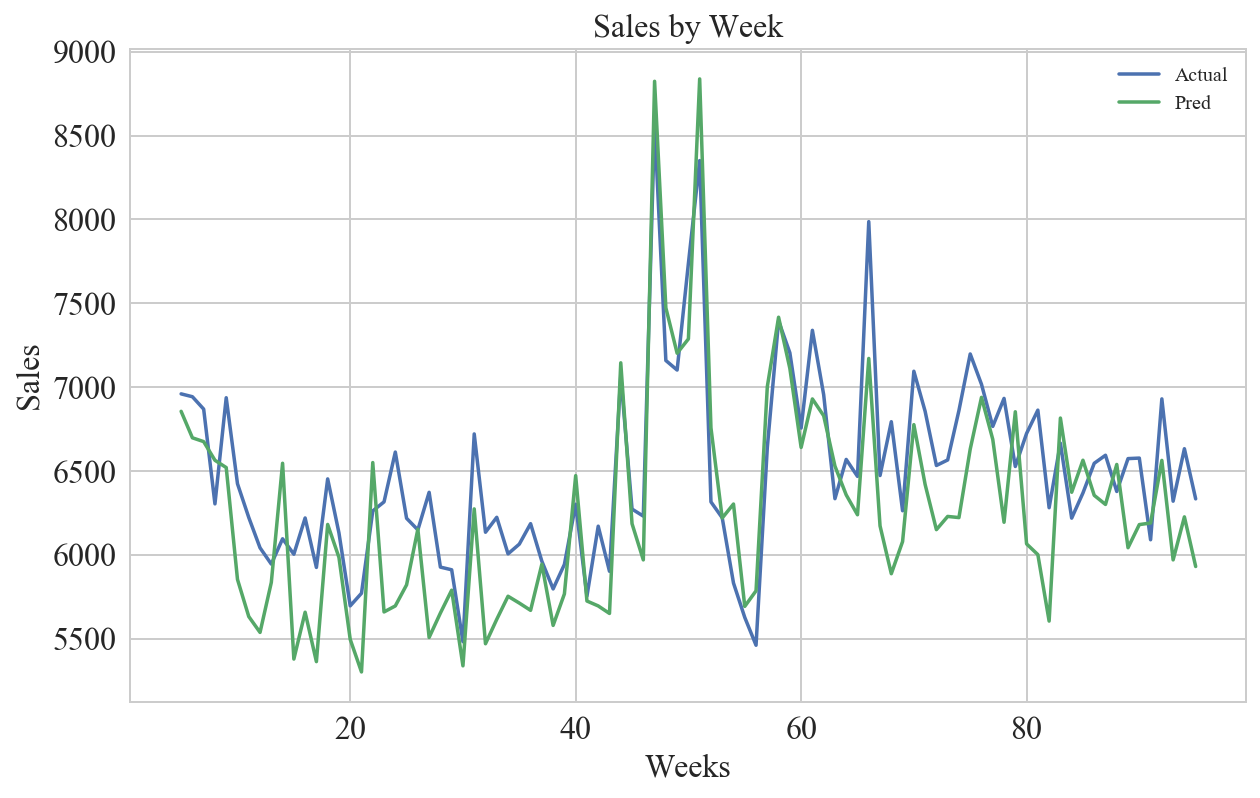

In [311]:
plt.figure(figsize=(10,6))
plt.plot(dfm[dfm['Store']==3]['Counter'], dfm[dfm['Store']==3][['WeeklySales','WeeklySalesPredicted']], )
plt.legend(['Actual','Pred'])
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.title('Sales by Week')
plt.show()

C:\Users\rahsood\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


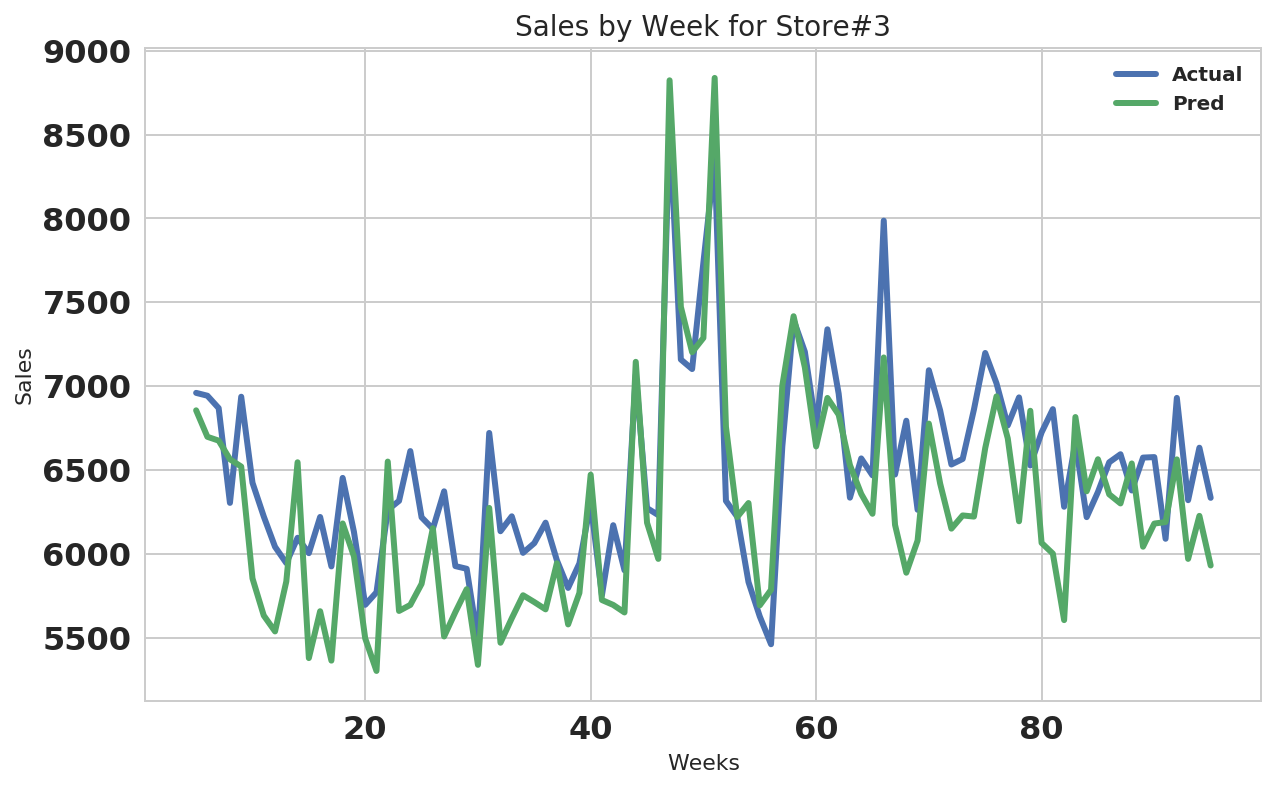

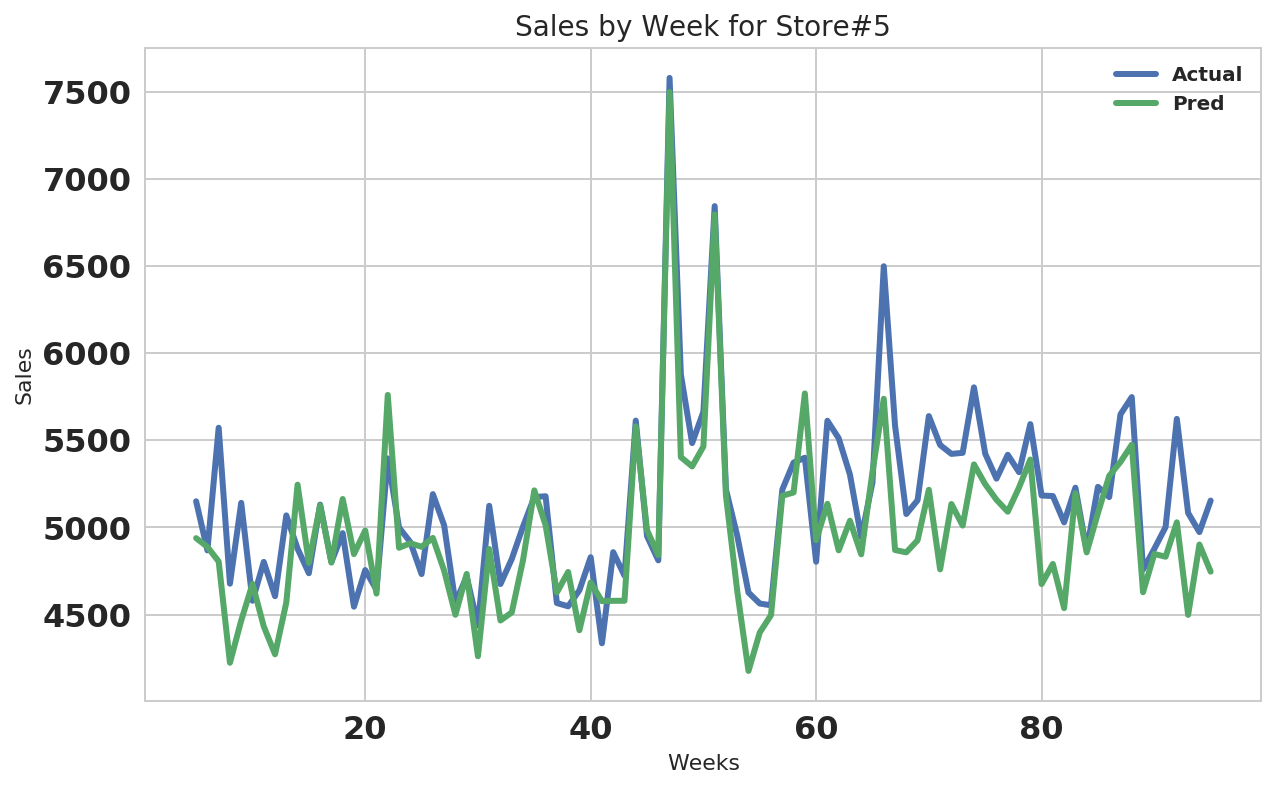

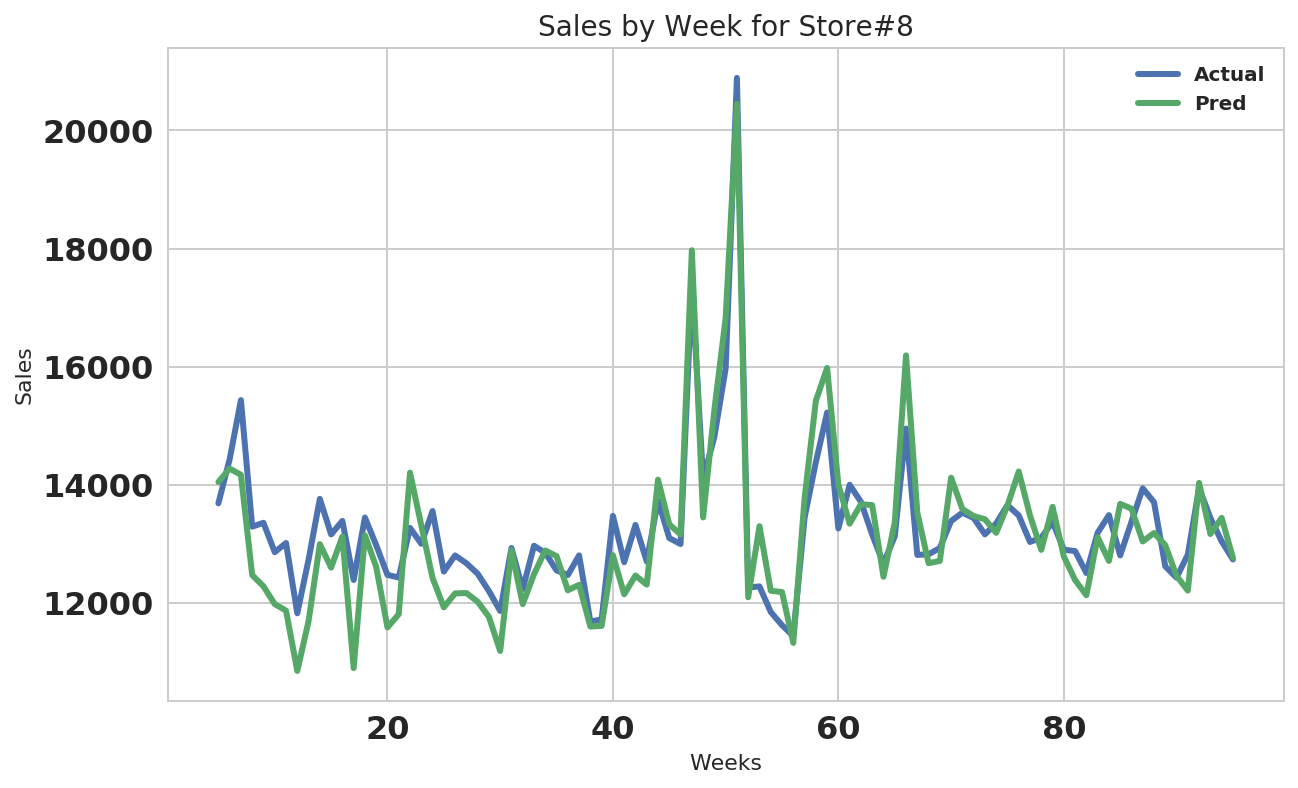

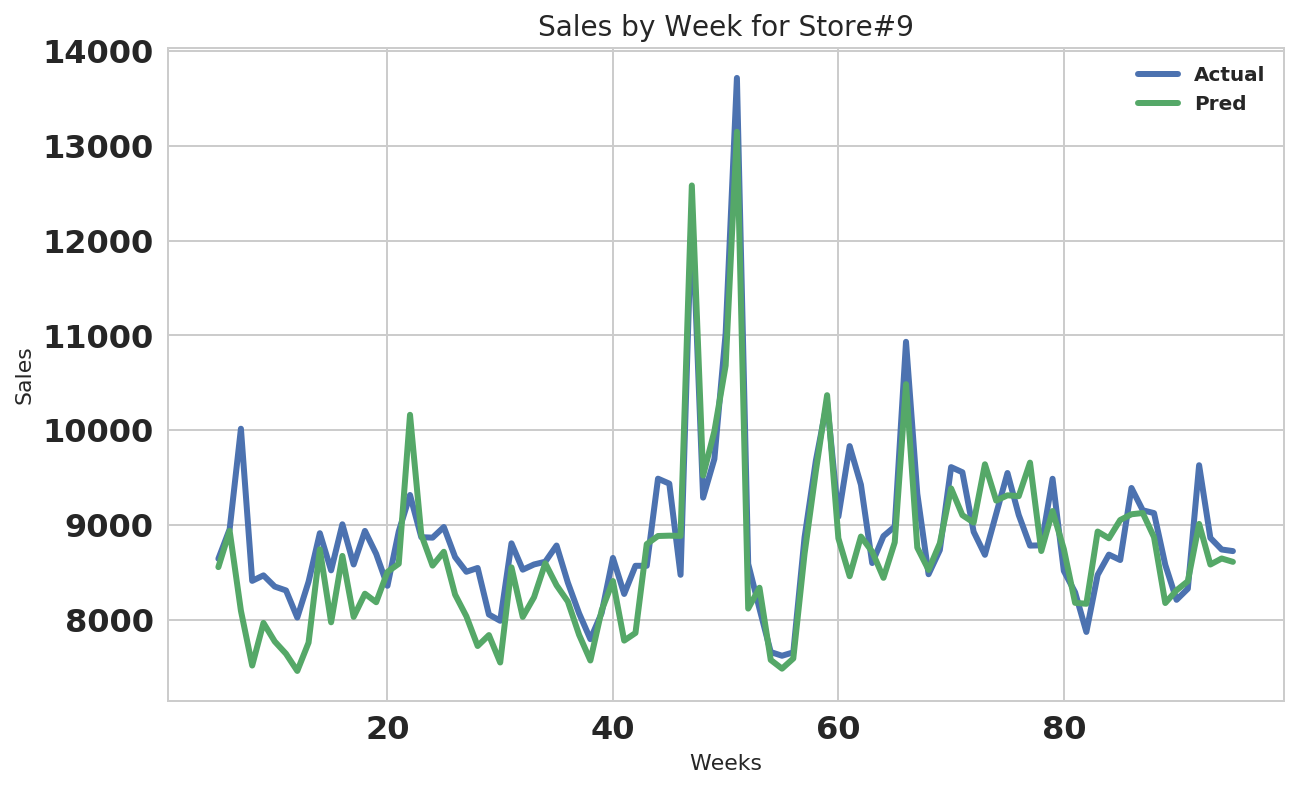

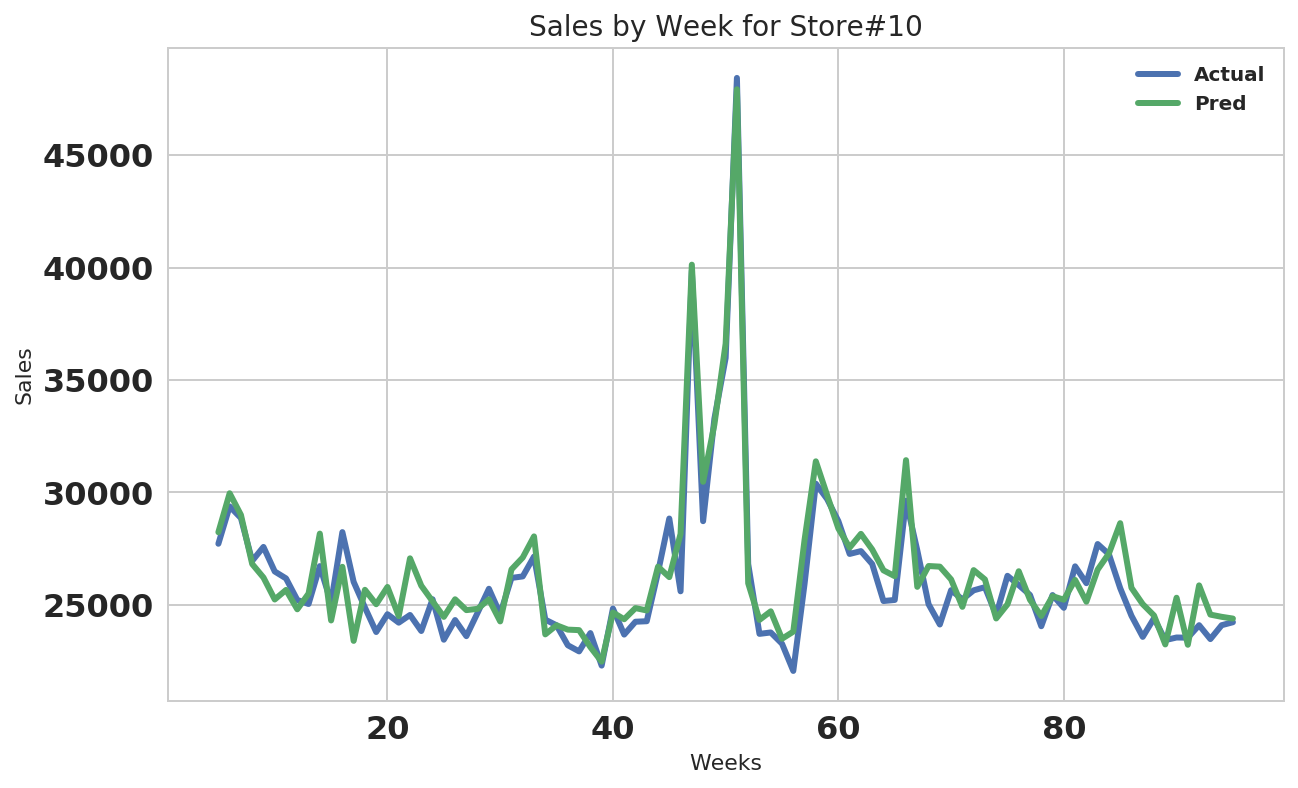

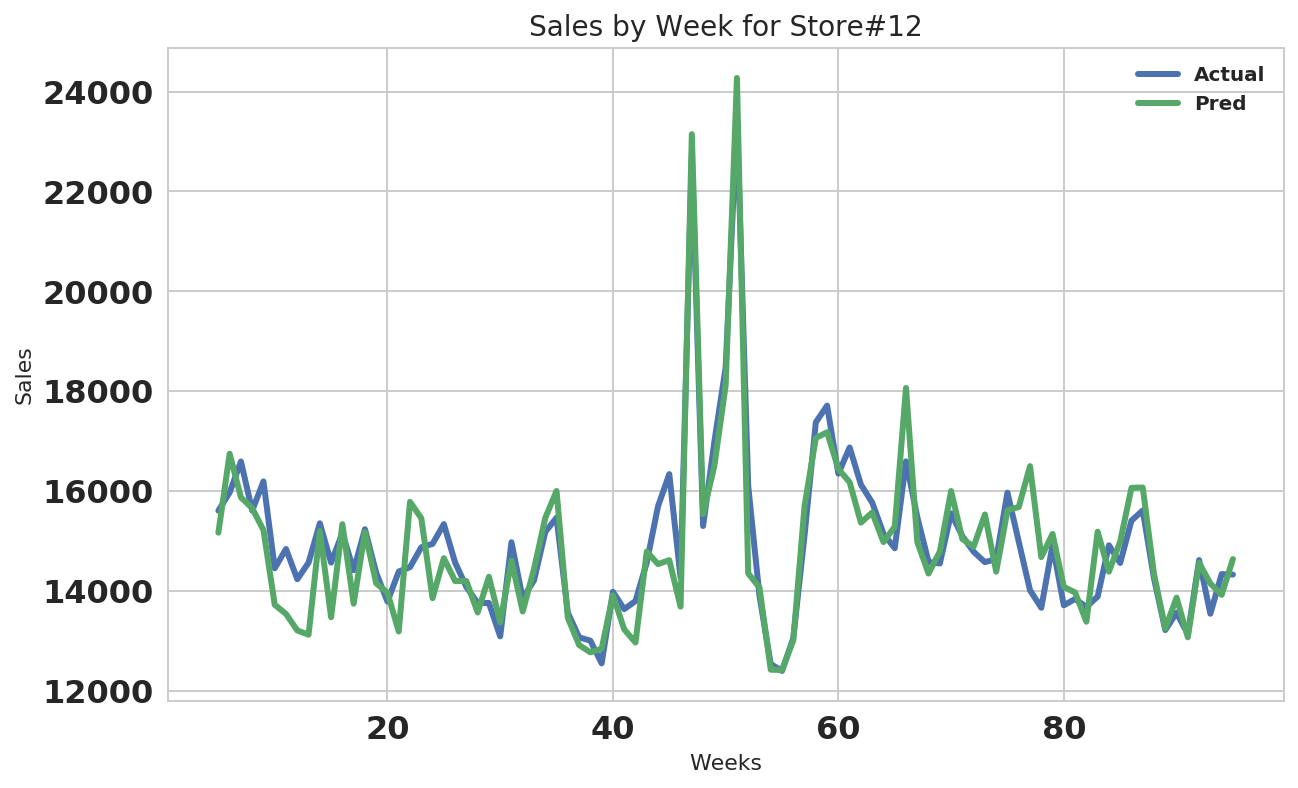

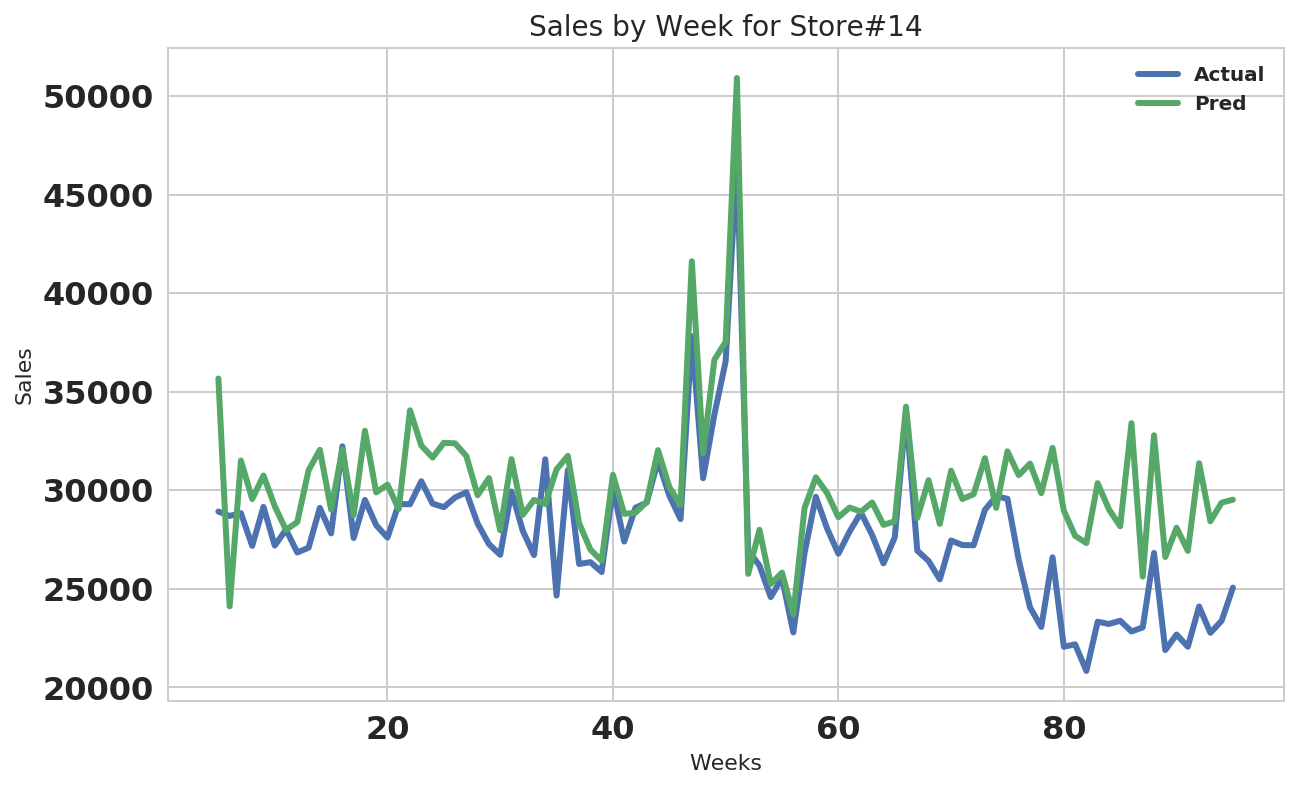

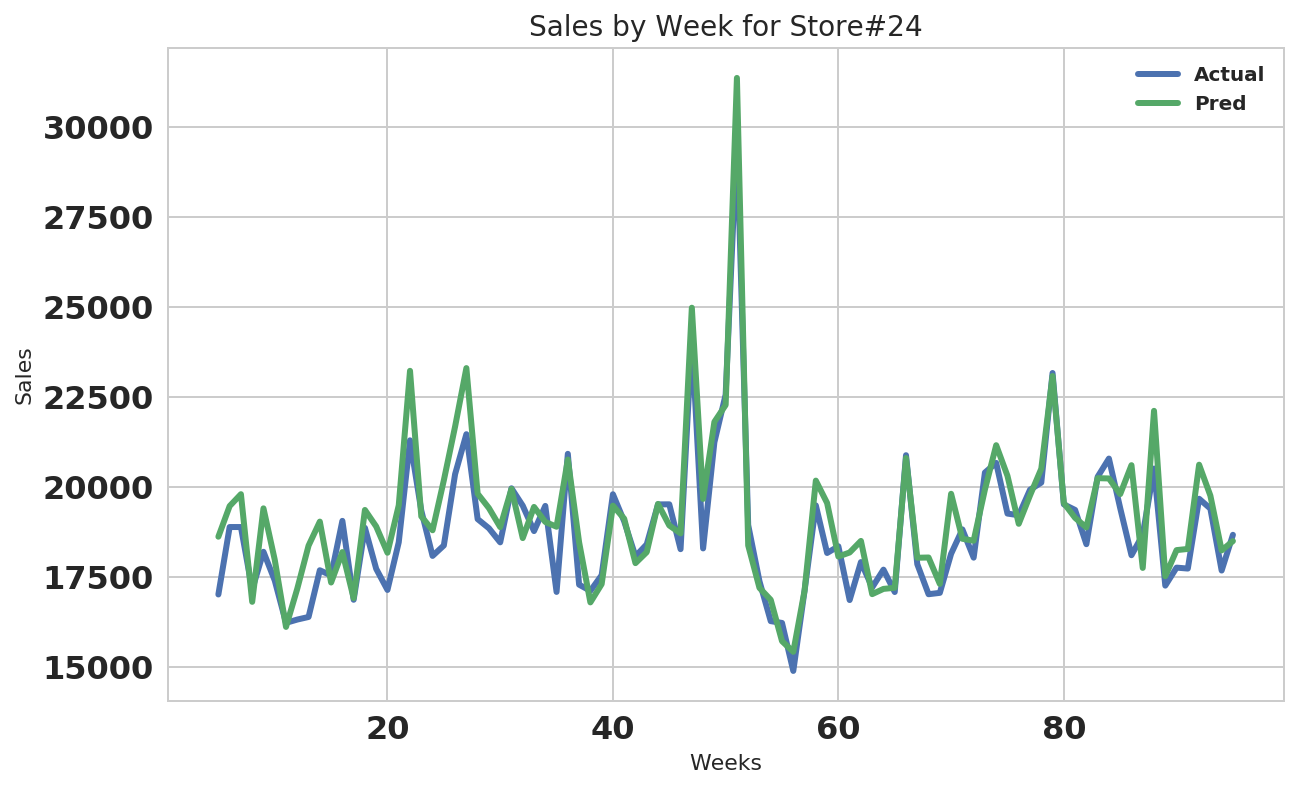

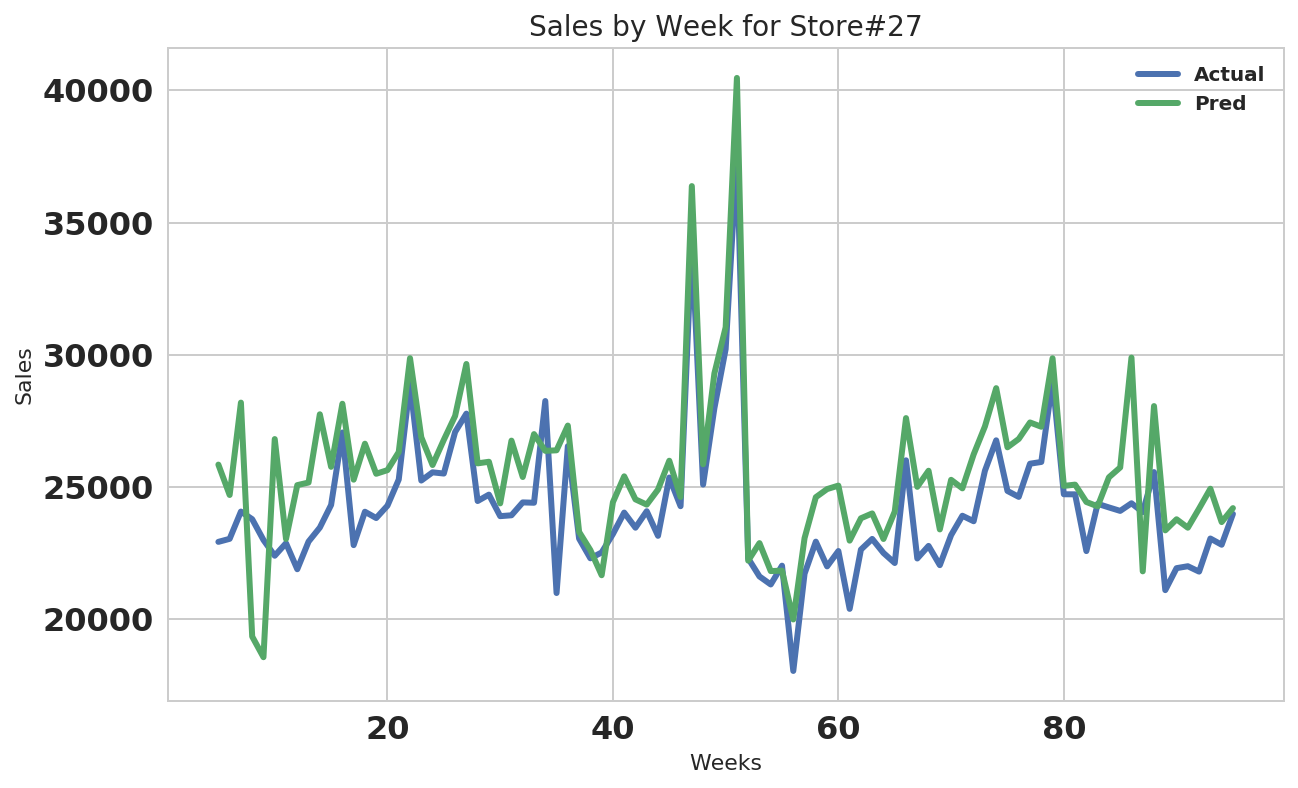

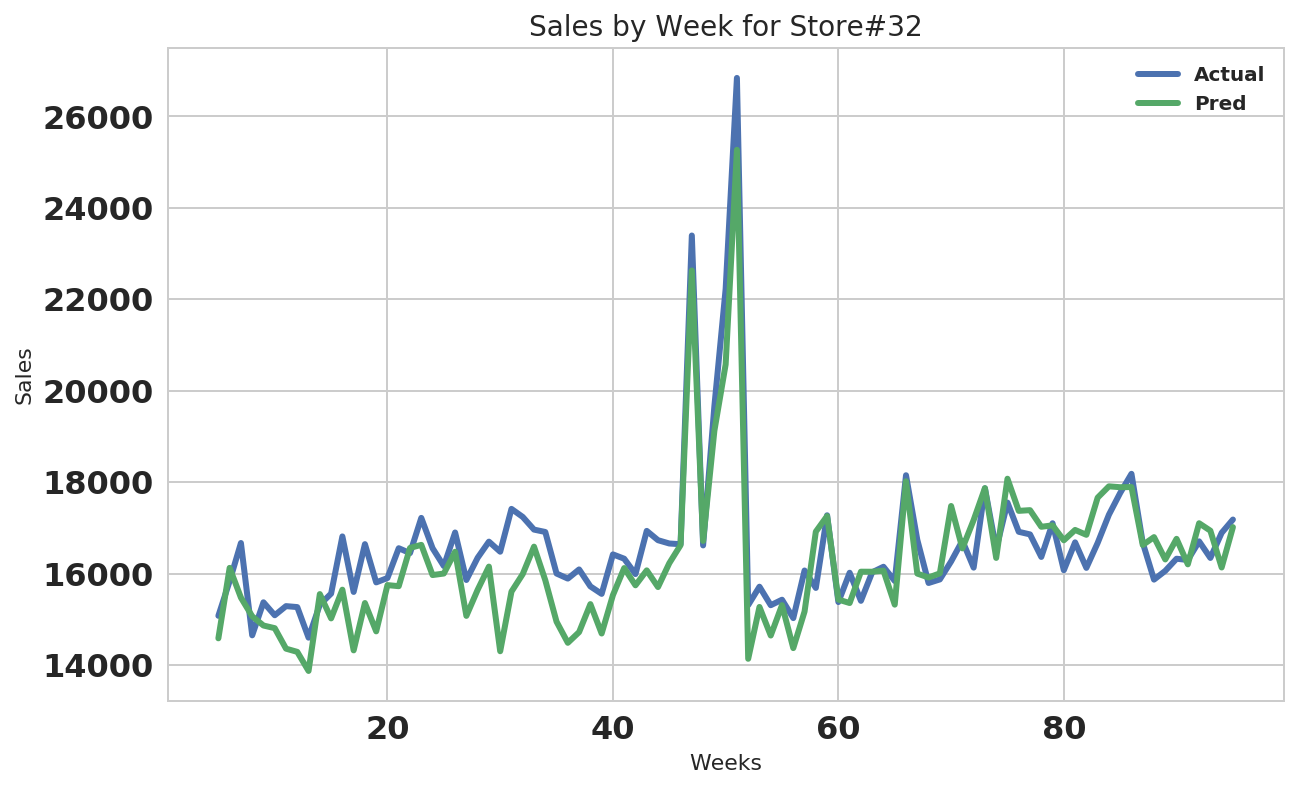

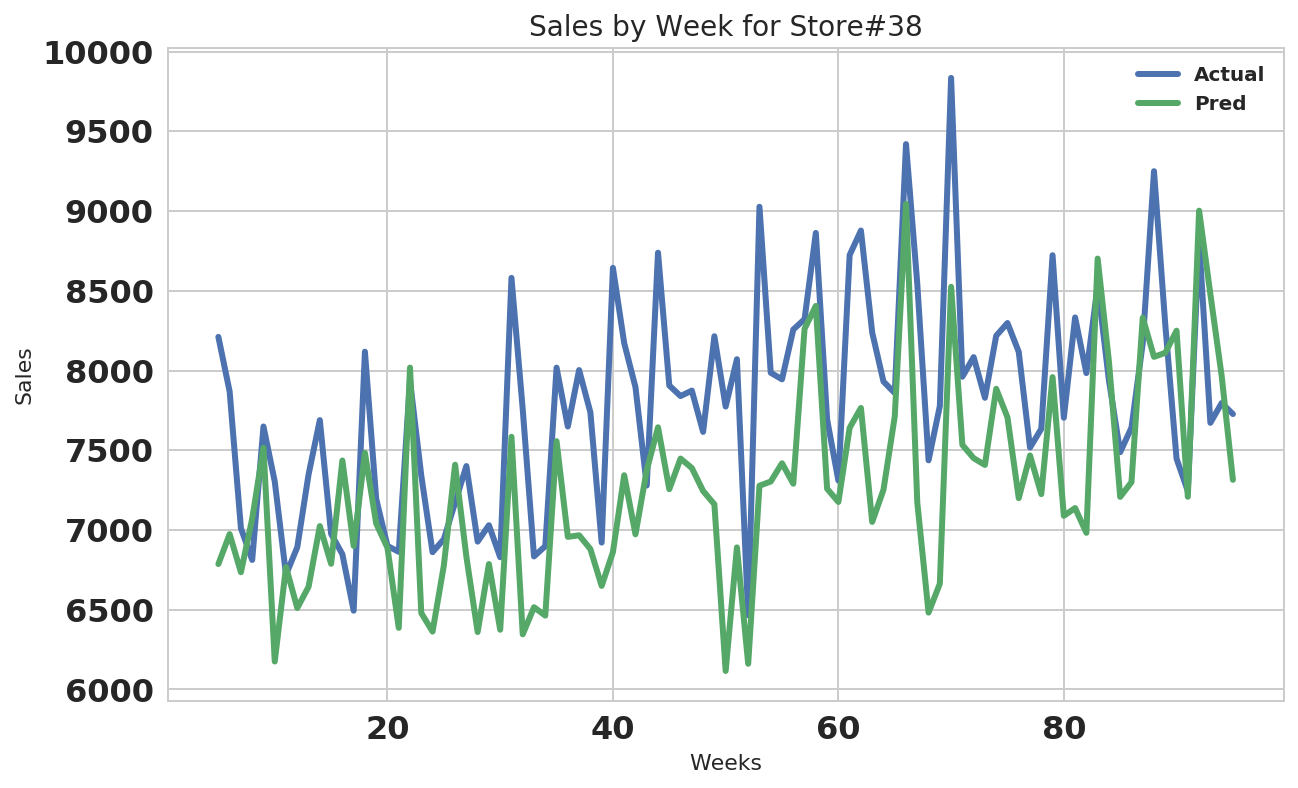

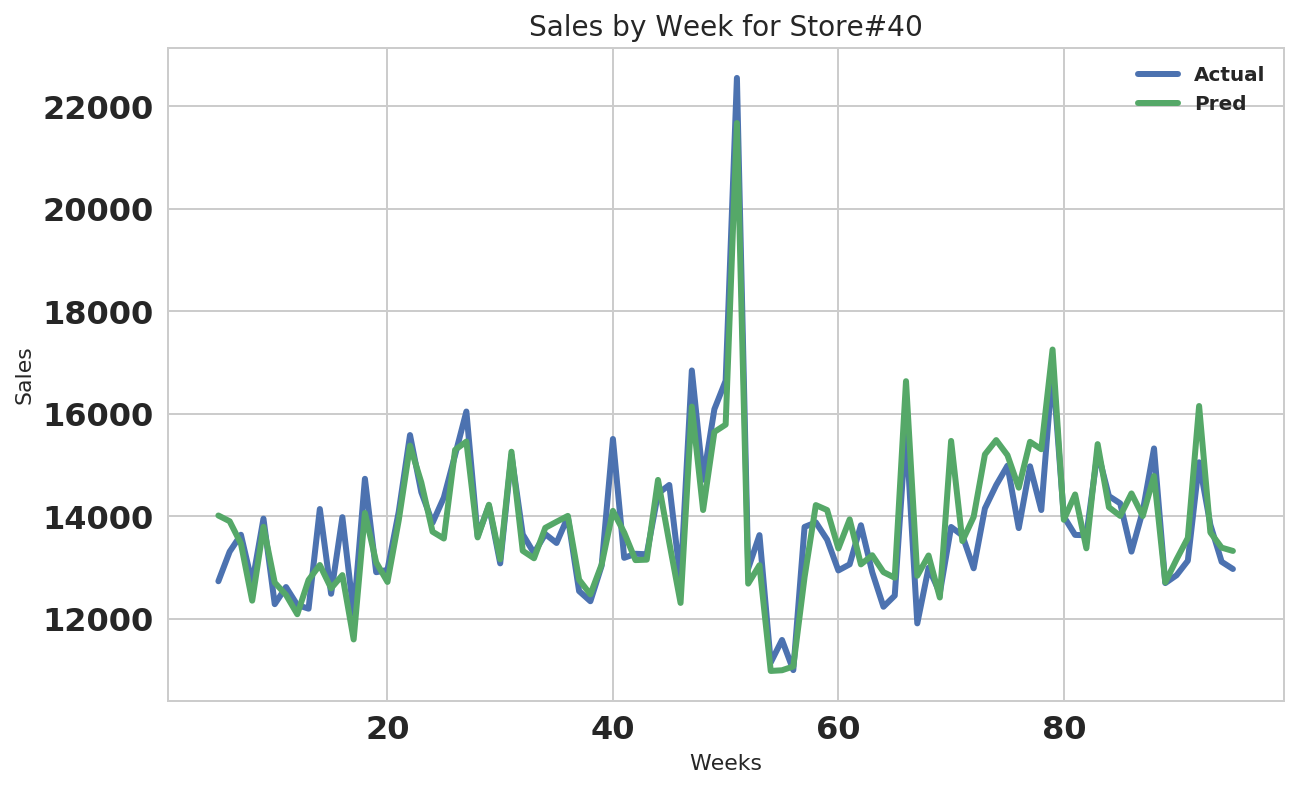

In [249]:
for store in dfm['Store'].unique():
#     print(store)
    title = np.array2string(store)
    title1 = 'Sales by Week for Store#'
    title = title1 + title
#     print(store.astype(str))
    plt.figure(figsize=(10,6))
#     plt.plot(dfm[dfm['Store']==3]['Counter'], dfm[dfm['Store']==3][['WeeklySales','WeeklySalesPredicted']], )
    plt.xlabel('Weeks')
    plt.ylabel('Sales')
    plt.title(title)
    plt.plot(dfm[dfm['Store']==store]['Counter'], dfm[dfm['Store']==store][['WeeklySales','WeeklySalesPredicted']], 
            lw=3)
    plt.legend(['Actual','Pred'])
    plt.show()

In [81]:
# df_test
df_test = df[(df.YearWeek>=forecast_start)]

In [82]:
len(df_test)

1755

In [79]:
df_test = df[df['Train']==False]

In [80]:
len(df_test)

1755

In [69]:
df_test.head()

Unnamed: 0       Date  IsHoliday  Train  WeeklySales  DateString  Week  \
6435        6435 2012-11-02      False  False          NaN  2012-11-02    44   
6436        6436 2012-11-02      False  False          NaN  2012-11-02    44   
6437        6437 2012-11-02      False  False          NaN  2012-11-02    44   
6438        6438 2012-11-02      False  False          NaN  2012-11-02    44   
6439        6439 2012-11-02      False  False          NaN  2012-11-02    44   

      Year YearWeek  WeeklySalesPreviousYear  WeeklySalesIncreaseRatio  \
6435  2012  2012-44                  23572.0                       NaN   
6436  2012  2012-44                  27601.0                       NaN   
6437  2012  2012-44                   7068.0                       NaN   
6438  2012  2012-44                  32129.0                       NaN   
6439  2012  2012-44                   5613.0                       NaN   

      Store_1  Store_2  Store_3  Store_4  Store_5  Store_6  Store_7  Store_8  \
6435        1        0        0        0        0        0        0        0   
6436        0        1        0        0        0        0        0        0   
6437        0        0        1        0        0        0        0        0   
6438        0        0        0        1        0        0        0        0   
6439        0        0        0        0        1        0        0        0   

      Store_9  Store_10  Store_11  Store_12  Store_13  Store_14  Store_15  \
6435        0         0         0         0         0         0         0   
6436        0         0         0         0         0         0         0   
6437        0         0         0         0         0         0         0   
6438        0         0         0         0         0         0         0   
6439        0         0         0         0         0         0         0   

      Store_16  Store_17  Store_18  Store_19  Store_20  Store_21  Store_22  \
6435         0         0         0         0         0         0         0   
6436         0         0         0         0         0         0         0   
6437         0         0         0         0         0         0         0   
6438         0         0         0         0         0         0         0   
6439         0         0         0         0         0         0         0   

      Store_23  Store_24  Store_25  Store_26  Store_27  Store_28  Store_29  \
6435         0         0         0         0         0         0         0   
6436         0         0         0         0         0         0         0   
6437         0         0         0         0         0         0         0   
6438         0         0         0         0         0         0         0   
6439         0         0         0         0         0         0         0   

      Store_30  Store_31  Store_32  Store_33  Store_34  Store_35  Store_36  \
6435         0         0         0         0         0         0         0   
6436         0         0         0         0         0         0         0   
6437         0         0         0         0         0         0         0   
6438         0         0         0         0         0         0         0   
6439         0         0         0         0         0         0         0   

      Store_37  Store_38  Store_39  Store_40  Store_41  Store_42  Store_43  \
6435         0         0         0         0         0         0         0   
6436         0         0         0         0         0         0         0   
6437         0         0         0         0         0         0         0   
6438         0         0         0         0         0         0         0   
6439         0         0         0         0         0         0         0   

      Store_44  Store_45  Store  IsHolidayInt  
6435         0         0      1             0  
6436         0         0      2             0  
6437         0         0      3             0  
6438         0         0      4             0  
6439         0      

In [75]:
len(df_test)

1755

In [85]:
df_test[['Week','Year','YearWeek','WeeklySalesPreviousYear','WeeklySalesIncreaseRatio','WeeklySales','Store']].head()

Week  Year YearWeek  WeeklySalesPreviousYear  WeeklySalesIncreaseRatio  \
6435    44  2012  2012-44                  23572.0                       NaN   
6436    44  2012  2012-44                  27601.0                       NaN   
6437    44  2012  2012-44                   7068.0                       NaN   
6438    44  2012  2012-44                  32129.0                       NaN   
6439    44  2012  2012-44                   5613.0                       NaN   

      WeeklySales  Store  
6435          NaN      1  
6436          NaN      2  
6437          NaN      3  
6438          NaN      4  
6439          NaN      5

In [73]:
store_cols = ['Store_%s'%i for i in range(1,51)]
myfeatures = ['Year', 'Week', 'IsHoliday'] + store_cols

In [74]:
myfeatures

['Year',
 'Week',
 'IsHoliday',
 'Store_1',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_12',
 'Store_13',
 'Store_14',
 'Store_15',
 'Store_16',
 'Store_17',
 'Store_18',
 'Store_19',
 'Store_20',
 'Store_21',
 'Store_22',
 'Store_23',
 'Store_24',
 'Store_25',
 'Store_26',
 'Store_27',
 'Store_28',
 'Store_29',
 'Store_30',
 'Store_31',
 'Store_32',
 'Store_33',
 'Store_34',
 'Store_35',
 'Store_36',
 'Store_37',
 'Store_38',
 'Store_39',
 'Store_40',
 'Store_41',
 'Store_42',
 'Store_43',
 'Store_44',
 'Store_45',
 'Store_46',
 'Store_47',
 'Store_48',
 'Store_49',
 'Store_50']

In [90]:
regressor

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [91]:
# df_test.nunique()
# forecast_idx = (df_test.YearWeek>=forecast_start)
# df_forecast = dff[forecast_idx]

X_forecast = df_test[features].values
y_forecast = regressor.predict(X_forecast)

In [92]:
y_forecast

array([1.01769477, 1.01210111, 1.01210123, ..., 0.99583358, 1.0440547 ,
       1.02566354])

In [93]:
forecast_idx = (dff.YearWeek>=train_start)

2       False
4       False
7       False
8       False
9       False
11      False
13      False
23      False
26      False
31      False
37      False
39      False
47      False
49      False
52      False
53      False
54      False
56      False
58      False
68      False
71      False
76      False
82      False
84      False
92      False
94      False
97      False
98      False
99      False
101     False
103     False
113     False
116     False
121     False
127     False
129     False
137     False
139     False
142     False
143     False
144     False
146     False
148     False
158     False
161     False
166     False
172     False
174     False
182     False
184     False
187     False
188     False
189     False
191     False
193     False
203     False
206     False
211     False
217     False
219     False
227     False
229     False
232     False
233     False
234     False
236     False
238     False
248     False
251     False
256     False
262     False
264   

In [96]:
df_test['WeeklySalesIncreaseRatio'] = y_forecast 
df_test['WeeklySales'] = df_test['WeeklySalesPreviousYear'] * y_forecast
# df_test.loc[pred_idx, 'WeeklySalesIncreaseRatioPredicted'] = y_forecast 
# df_test.loc[pred_idx, 'WeeklySalesPredicted'] = df_test['WeeklySalesPreviousYear'] * y_forecast
# df_test.loc[pred_idx, 'Residuals'] = df_test['WeeklySales'] - df_test['WeeklySalesPreviousYear'] * y_forecast

C:\Users\rahsood\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rahsood\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
df_test.head()

Unnamed: 0       Date  IsHoliday  Train   WeeklySales  DateString  Week  \
6435        6435 2012-11-02      False  False  23989.101139  2012-11-02    44   
6436        6436 2012-11-02      False  False  27935.002710  2012-11-02    44   
6437        6437 2012-11-02      False  False   7153.531465  2012-11-02    44   
6438        6438 2012-11-02      False  False  33575.492340  2012-11-02    44   
6439        6439 2012-11-02      False  False   5680.924181  2012-11-02    44   

      Year YearWeek  WeeklySalesPreviousYear  WeeklySalesIncreaseRatio  \
6435  2012  2012-44                  23572.0                  1.017695   
6436  2012  2012-44                  27601.0                  1.012101   
6437  2012  2012-44                   7068.0                  1.012101   
6438  2012  2012-44                  32129.0                  1.045021   
6439  2012  2012-44                   5613.0                  1.012101   

      Store_1  Store_2  Store_3  Store_4  Store_5  Store_6  Store_7  Store_8  \
6435        1        0        0        0        0        0        0        0   
6436        0        1        0        0        0        0        0        0   
6437        0        0        1        0        0        0        0        0   
6438        0        0        0        1        0        0        0        0   
6439        0        0        0        0        1        0        0        0   

      Store_9  Store_10  Store_11  Store_12  Store_13  Store_14  Store_15  \
6435        0         0         0         0         0         0         0   
6436        0         0         0         0         0         0         0   
6437        0         0         0         0         0         0         0   
6438        0         0         0         0         0         0         0   
6439        0         0         0         0         0         0         0   

      Store_16  Store_17  Store_18  Store_19  Store_20  Store_21  Store_22  \
6435         0         0         0         0         0         0         0   
6436         0         0         0         0         0         0         0   
6437         0         0         0         0         0         0         0   
6438         0         0         0         0         0         0         0   
6439         0         0         0         0         0         0         0   

      Store_23  Store_24  Store_25  Store_26  Store_27  Store_28  Store_29  \
6435         0         0         0         0         0         0         0   
6436         0         0         0         0         0         0         0   
6437         0         0         0         0         0         0         0   
6438         0         0         0         0         0         0         0   
6439         0         0         0         0         0         0         0   

      Store_30  Store_31  Store_32  Store_33  Store_34  Store_35  Store_36  \
6435         0         0         0         0         0         0         0   
6436         0         0         0         0         0         0         0   
6437         0         0         0         0         0         0         0   
6438         0         0         0         0         0         0         0   
6439         0         0         0         0         0         0         0   

      Store_37  Store_38  Store_39  Store_40  Store_41  Store_42  Store_43  \
6435         0         0         0         0         0         0         0   
6436         0         0         0         0         0         0         0   
6437         0         0         0         0         0         0         0   
6438         0         0         0         0         0         0         0   
6439         0         0         0         0         0         0         0   

      Store_44  Store_45  Store  IsHolidayInt  \
6435         0         0      1             0   
6436         0         0      2             0   
6437         0         0      3             0   
6438         0         0      4             0   
6439     

In [121]:
tr1 = len(df[(df.YearWeek>=train_start) & (df.YearWeek<=train_end)])
trs = len(df[df.Store.isin(train_stores)])
len(df), len(df_train), len(df_test), len(df[(df.YearWeek<train_start)]), len(df[df['Train']==True]), tr1, trs
# df.Store.nunique()
# train_stores # 33

(8190, 3003, 1755, 2340, 6435, 4095, 6006)

In [100]:
df.head()

Unnamed: 0       Date  IsHoliday  Train  WeeklySales  DateString  Week  \
0           0 2010-02-05      False   True      22516.0  2010-02-05     5   
1           1 2010-02-05      False   True      29273.0  2010-02-05     5   
2           2 2010-02-05      False   True       7101.0  2010-02-05     5   
3           3 2010-02-05      False   True      29248.0  2010-02-05     5   
4           4 2010-02-05      False   True       5115.0  2010-02-05     5   

   Year YearWeek  WeeklySalesPreviousYear  WeeklySalesIncreaseRatio  Store_1  \
0  2010  2010-05                      NaN                       NaN        1   
1  2010  2010-05                      NaN                       NaN        0   
2  2010  2010-05                      NaN                       NaN        0   
3  2010  2010-05                      NaN                       NaN        0   
4  2010  2010-05                      NaN                       NaN        0   

   Store_2  Store_3  Store_4  Store_5  Store_6  Store_7  Store_8  Store_9  \
0        0        0        0        0        0        0        0        0   
1        1        0        0        0        0        0        0        0   
2        0        1        0        0        0        0        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        0        1        0        0        0        0   

   Store_10  Store_11  Store_12  Store_13  Store_14  Store_15  Store_16  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Store_17  Store_18  Store_19  Store_20  Store_21  Store_22  Store_23  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Store_24  Store_25  Store_26  Store_27  Store_28  Store_29  Store_30  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Store_31  Store_32  Store_33  Store_34  Store_35  Store_36  Store_37  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Store_38  Store_39  Store_40  Store_41  Store_42  Store_43  Store_44  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Store_45  Store  IsHolidayInt  
0         0      1             0  
1         0      2             0  
2         0      3             0  
3         0      4             0  
4         0      5             0